<a href="https://colab.research.google.com/github/xiaoras/Monte-Carlo-1/blob/master/monte_carlo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Method for computing Integrals

<p>
<div style="text-align: justify">
We are interested in a method to numerically compute multidimensional integrals of the form 
\begin{align}
I := \int_\Omega dx \ f(x)
\end{align}
where $\Omega \subset \mathbb R^n$ has volume
\begin{align}
V := \int_\Omega dx
\end{align}
The **Monte Carlo method** to attack this problem consists in uniformly sampling $m$ points $x^{(1)},..,x^{(m)} \in \Omega$, and then compute
\begin{align}
Q_m := V \dfrac{1}{m} \sum_{\mu=1}^m f(x^{(\mu)})
\end{align}
From the law of large numbers, we have that
\begin{align}
\lim_{m \to \infty} Q_m = I
\end{align}
What is the error that we make when we estimate $I$ by $Q_m$? Imagine that we repeat the evaluation of $Q_m$ for $N$ different samples (each of which contains $m$ points). Then, we can define the mean and the standard deviation as
\begin{align}
\langle Q_m \rangle = \dfrac{1}{N} \sum_{a=1}^N Q_m(a)
\end{align}
and
\begin{align}
\sigma_N^2 = \langle Q_m^2 \rangle - \langle Q_m \rangle^2 = \dfrac{1}{N} \sum_{a=1}^N Q_m(a)^2 - \left(\dfrac{1}{N} \sum_{a=1}^N Q_m(a)\right)^2
\end{align}
respectively, where $Q_m(a)$ denotes the evaluation of $Q_m$ on the $a$th sample. Now, by the central limit theorem, the quantities $Q_m(a)$ are normally distributed around the mean $\langle Q_m \rangle$ with variance $\sigma_N^2$. But for large $m$, $\langle Q_m \rangle \approx I$, so it follows that, with a probablity of $0.95$, the value of $Q_m(a)$ for a given sample will fall within the range $[I - 2\sigma_N,I + 2\sigma_N]$. Computing $\sigma_N$ is not feasible, since it requires a large number $N$ samples. Fortunately, it is possible to show that
\begin{align}
\sigma_N \approx I \dfrac{\sigma_m}{\sqrt m}
\end{align}
(the exact equality holds in the $N \to \infty$ limit), where $\sigma_m$ is the standard deviation of a single sample:
\begin{align}
\sigma_m^2 := \dfrac{1}{m} \sum_{\mu=1}^m f(x^{(\mu)})^2 - \left(\dfrac{1}{m} \sum_{\mu=1}^m (f(x^{(\mu)})\right)^2
\end{align}
In other words, the relative error of estimating $I$ with $Q_m$ is
\begin{align}
\delta Q_m = \dfrac{|Q_m - I|}{I} \approx \dfrac{\sigma_m}{\sqrt m}
\end{align}
We can then see that $\delta Q_m$ decreases with the size $m$ of the sample as $1/\sqrt m$, independently of the dimension $n$ of the space $\Omega$: in this sense, Monte Carlo is not affected by the "curse of dimensionality" typical of other approaches (e.g., if we approximate $\Omega$ by a fixed grid or points).
</div>

### Example: Squaring the Circle

<p>
<div style="text-align: justify">
A way to estimate $\pi$ is to recall that the area of a circle of radius $R$ is $A_C(R) = \pi R^2$. We therefore wish to compute the area of a circle of radius $R=1$. To compute this area as an integral, we take $\Omega$ to be the square in which the circle is inscribed (so that $V = 4$). If, for simplicity, the circle is centered at $(0,0) \in \mathbb R^2$, then we have
\begin{align}
A_C(1) = \int_\Omega dx \ f(x)
\end{align}
where
\begin{align}
f(x) = \left\{\begin{array}{ll}
1 & \text{if} \ x_1^2 + x_2^2 \leq 1
\\
0 & \text{otherwise}
\end{array}\right.
\end{align}
By Monte Carlo, we now estimate $I$ via $Q_m$, and the intuition is clear:
\begin{align}
A_C(1) \approx \text{area of the square} \times \frac{\text{number or points inside the circle}}{\text{number or points inside the square}} = V \frac{\sum_{\mu=1}^m f(x^{(\mu)})}{m} = Q_m
\end{align}
The following code is an implementation of this exercise, where we also plot $\delta Q_m$ and show that it indeed goes as $1/\sqrt m$.
</div>

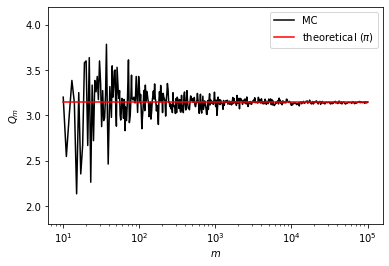

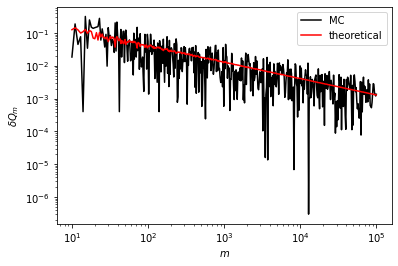

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

def f(x): # The function we wish to integrate
    if x[0]**2 + x[1]**2 <= 1:
        return 1
    else:
        return 0

def Q(x,V): # Estimator of the integral I of f, i.e., V times sample mean of f
    m = len(x)
    return V * sum([f(x[mu]) for mu in range(m)])/m

def sigma2(x,V): # Sample variance of f
    m = len(x)
    return sum([f(x[mu])**2 for mu in range(m)])/m - (Q(x,V)/V)**2

def sample(m): # Generates a sample of m points uniformly distributed in the square
    X1 = np.random.uniform(-1,1,m)
    X2 = np.random.uniform(-1,1,m)
    return np.stack((X1, X2), axis=-1)

np.random.seed(1)

M = np.unique(np.logspace(1, 5, num=500).astype(int)) # equally log-spaced values for m
X = {m : sample(m) for m in M}

q = np.array([Q(X[m],4) for m in M])
error = abs(q - np.pi)/np.pi

q_theo = np.array([np.pi for m in M])
error_theo = np.array([np.sqrt(sigma2(X[m],4)/m) for m in M])

# comparison between Qm and I as a function of m
plt.plot(M,q,'k',label='MC')
plt.plot(M,q_theo,'r',label='theoretical ($\pi$)')
plt.xscale('log')
plt.ylim(1.8,4.2)
plt.legend()
plt.xlabel('$m$')
plt.ylabel('$Q_m$')
plt.show()

# comparison of the error and the theoretical estimate sqrt(sigma2/m)
plt.plot(M,error,'k',label='MC')
plt.plot(M,error_theo,'r',label='theoretical')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$m$')
plt.ylabel('$\delta Q_m$')
plt.show()

# Monte Carlo Method for simulating any Distribution: MCMC

<p>
<div style="text-align: justify">
Consider $X$ random variable taking values in $\Omega$ according to the probability distribution function (pdf) $p_X$. We are interested in computing expected values of functions of $X$. Given one such a function $f$, we have
\begin{align}
\mathbb E[f] := \int_\Omega dx \ p_X(x) f(x)
\end{align}
This is a generalization of the integrals discussed above: in that case $p_X(x) = 1/V$ (i.e., the uniform distribution on $\Omega$). As such, the Monte Carlo method we described in not ideal now, since choosing $m$ points uniformly distributed on $\Omega$ will result in most points having little relevance for $\mathbb E[f]$ (e.g., if $p_X$ is the normal distribution $\mathcal N(0,1)$ and $\Omega = [-10^5,10^5]$). Fortunately, there exists a procedure that selects (almost) always the "important points" for the pdf $p_X$: the **Markov Chain Monte Carlo method (MCMC)**.
</div>
<p>
<div style="text-align: justify">
More precisely, we will implement the **Metropolis algorithm**, which allows to sample $m$ points from any pdf $p_X$ provided that we know a function $L(x)$ proportional to $p_X(x)$. Once we have one such collection of points $x^{(1)},..,x^{(m)} \in \Omega$, we can estimate the expected value of $f$ (exact integral) via the sample expected value (sum), as done in "naive" Monte Carlo method:
\begin{align}
\mathbb E[f] \approx \dfrac{1}{m} \sum_{\mu=1}^m f(x^{(\mu)})
\end{align}
In Metropolis algorithm, the sample $x^{(1)},..,x^{(m)} \in \Omega$ is produced iteratively, in the sense that the distribution of the point $x^{(\mu+1)}$ depends (only) on the point $x^{(\mu)}$. If we think of $\mu$ as time, we then see that the sequence $(x^{(1)},x^{(2)},...)$ is a Markov chain (which is why the method is called MCMC).
</div>
<p>
<div style="text-align: justify">
Let us describe the steps of the algorithm:
</div>
<p>
<ul>
  <li><div style="text-align: justify">Initialize the first point $x^{(0)} \in \Omega$ and a pdf $\tilde p_{X|Y}$ symmetric around $y$. The standard option is the normal distribtution $\mathcal N(y,c)$, where we refer to $c$ as the *step-size*. Note that the sequence $(\tilde x^{(0)}, \tilde x^{(1)}, ...)$ constructed iteratively via $\tilde x^{(\mu+1)} \sim \tilde p_{X|Y}(\tilde x^{(\mu+1)} | \tilde x^{(\mu)})$ starting from $\tilde x^{(0)} = x^{(0)}$ is a random walk.</div></li>
  <p>  
  <li><div style="text-align: justify">Repeat:</div></li>  
  <p>  
  <ul>  
    <li><div style="text-align: justify">Generate candidate $\mu+1$ as $x' \sim \tilde p_{X|Y}(x' | x^{(\mu)})$. </div></li>  
  <p>  
    <li><div style="text-align: justify">Calculate the *acceptance ratio* $\alpha := L(x')/L(x^{(\mu)})$, which is equal to $p_X(x')/p_X(x^{(\mu)})$ since $L \propto p_X$.</div></li>
  <p>  
    <li><div style="text-align: justify">Generate $u \sim \text{Uniform}(0,1)$. If $u \leq \alpha$, accept the candidate setting $x^{(\mu+1)} = x'$. Else, reject the candidate setting $x^{(\mu+1)} = x^{(\mu)}$.</div></li>    
  </ul>
</ul>
<p>
<div style="text-align: justify">
The acceptance ratio $\alpha$ indicates how probable the candidate $x'$ is wrt the current outcome $x^{(\mu)}$, according to $p_X$: if $x'$ is more probable than $x^{(\mu)}$, then $f_X(x')/f_X(x^{(\mu)}) > 1$, so $u \leq \alpha$ for any $u$ and we thus certainly accept the candidate; if $x'$ is less probable than $x^{(\mu)}$, then $f_X(x')/f_X(x^{(\mu)}) < 1$, so $u \leq \alpha$ with probability $\alpha$ and this is thus the probability with which we accept the candidate. This procedure drives the sequence from the generically unimportant point $x^{(0)}$ to the high-density region of $p_X$ (this phase is called *burn-in*), after which the sequence tends to remain in this region while occasionally probing low-density regions. We say that *the sequence has thermalized*. If we wish to use the sequence to estimate expected values, we must remember to eliminate the initial burn-in part (as the points in this part are not really following the pdf $p_X$), thus keeping only the thermalized part of the sequence.
</div>

### Example: MCMC for Normal Distribution

<p>
<div style="text-align: justify">
Consider the pdf $p_X(x) = e^{-x^2/2}/\sqrt{2\pi}$, corresponding to $\mathcal N(0,1)$. We wish to implement Metropolis algorithm for MCMC with this pdf.
</div>
<p>
<div style="text-align: justify">
In this case, we can choose $L(x) = e^{-x^2/2}$, but since this is a very localized distribution, we might run into errors when numerically evaluating $\alpha$ (the denominator $L(x^{(\mu)})$ could be numerically indistinguishable from zero, if we start from a point $x^{(0)}$ far from $x=0$). Therefore, in the following code we define $S(x) := x^2/2$ and write $\alpha = e^{S(x^{(\mu)}) - S(x')}$.
</div>
<p>
<div style="text-align: justify">
After obtaining the markov chain, we plot $x^{(\mu)}$ as a function of $\mu$ to show the thermalization of the sequence: we start from $x^{(0)} = 100$ (which is extremely improbable according to $p_X$), and confirm that the sequence thermalizes around $\mu=250$. Next, we plot two histograms for the chain $\{x^{(m_0)},x^{(m_0+1)},...,x^{(m)}\}$ (with $m_0 = 300$, so as to eliminate the burn-in part): one for $m = 10^3$, the other for $m = 10^5$. These show that the Gaussian profile is approached as $m$ increases. We finally use the sequence with $m = 10^5$ to confirm that $\mathbb E[x] \approx 0$ and $\mathbb E[x^2] \approx 1$.
</div>

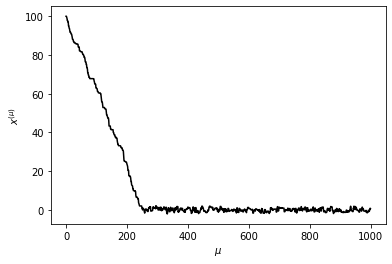

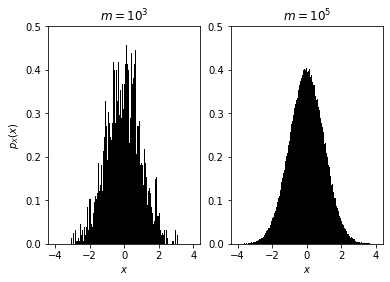

E[x] = 0.00038372810929753224
E[x^2] = 1.0042140172458751


In [2]:
def S(x): # S(x) = -log(L(x)), with L proportional to the distribution we wish to sample
    return x**2/2

def markov_chain(x0,c,m,S):
# Return a sequence of m points following a pdf proportional to L(x) = exp(-S(x)) (starting point x0, step-size c)
    chain = [x0]
    for mu in range(1,m):
        x_old = chain[-1]
        x = np.random.normal(x_old,c)
        alpha = np.exp(S(x_old)-S(x))
        u = np.random.uniform(0,1)
        if u <= alpha:
            chain.append(x)
        else:
            chain.append(x_old)
    return chain

np.random.seed(1)

m = 1000
M = np.array(range(m))
X = np.array(markov_chain(100,1,m,S))

# plot of X[mu] as a function of mu: thermalization takes place after initial burn-in
plt.plot(M,X,'k')
plt.xlabel('$\mu$')
plt.ylabel('$x^{(\mu)}$')
plt.show()

# histograms of X for two values of m: profile of the theoretical pdf is approached for m larger
X = np.array(markov_chain(100,1,int(10e3),S))[300:]
plt.subplot(1,2,1)
plt.hist(X,density=True,bins=500,range=(-4,4),color='k')
plt.ylim(0,0.5)
plt.ylabel('$p_X(x)$')
plt.xlabel('$x$')
plt.title('$m = 10^3$')
X = np.array(markov_chain(100,1,int(10e5),S))[300:]
plt.subplot(1,2,2)
plt.hist(X,density=True,bins=500,range=(-4,4),color='k')
plt.ylim(0,0.5)
plt.xlabel('$x$')
plt.title('$m = 10^5$')
plt.show()

def expected_value(F,X,*args): # Expected value of function F (which may depend on variables *args) on the chain X
    m = len(X)
    return sum([F(x,*args) for x in X])/m

def F_power(X,n): # Power function (used as F in expected_value). Note that F_power(X,1) is the identity function
    return X**n

print("E[x] = {0}".format(expected_value(F_power,X,1)))
print("E[x^2] = {0}".format(expected_value(F_power,X,2)))

# MCMC and Statistical Inference

<p>
<div style="text-align: justify">
Suppose we wish to study the relation between two observables, $X$ and $Y$, as we suspect that there exists a mathematical rule: our theory tells us that
\begin{align}
Y = h_\theta(X)
\end{align}
where $h_\theta$ is a given function (called *hypothesis*) of $X$ and of a number of other parameters $\theta$. Our purpose is to find the correct values of parameters $\theta = (\theta_1,..,\theta_n)$.
</div>
<p>
<div style="text-align: justify">
To do so, we must collect data. We therefore perform the simultaneous measurement of observables $X$ and $Y$, collecting many such measurements. Let us denote each measurement outcome by $(x^{(a)},y^{(a)})$, with $a=1,..,A$. Since the data suffers from measurement errors, we cannot claim that $h_\theta(x^{(a)}) = y^{(a)}$, even if our hypothesis is perfectly correct and we choose the "correct" values of $\theta$. We thus define the errors of each measurement as
\begin{align}
\epsilon_a := y^{(a)} - h_\theta(x^{(a)})
\end{align}
The assumption is now that these errors are normally distributed. More precisely, the $A$-dimensional column-vector $\vec \epsilon$ (whose $a$th element is $\epsilon_a$) is the outcome of a random variable $\vec E$ distributed according to $\mathcal N(\vec 0, \Sigma)$, where $\Sigma$ is a given $A \times A$ covariance matrix. Therefore, we can write the pdf of $\vec \epsilon$ with parameters $\theta$ as
\begin{align}
p_{\vec E}(\vec \epsilon; \theta) = \dfrac{1}{\sqrt{(2\pi)^m|\det\Sigma|}} e^{-\frac{1}{2} \vec \epsilon^T \Sigma^{-1} \vec \epsilon}
\end{align}
Now, the parameters $\theta$ are unknown, and so -- from a Bayesian point of view -- we can think of $\theta$ as the outcome of a random variable $\Theta$. Then, $p_{\vec E}(\vec \epsilon; \theta)$ can be regarded as a conditional probability $p_{\vec E | \Theta}(\vec \epsilon | \theta)$: the probability of finding data errors $\vec E = \vec \epsilon$ given that the parameters are $\Theta = \theta$. By Bayes' theorem, we can thus write the inverse conditional probability, that is, the pdf of finding parameters $\Theta = \theta$ given the data errors are $\vec E = \vec \epsilon$:
\begin{align}
p_{\Theta | \vec E}(\theta | \vec \epsilon) = \dfrac{p_{\vec E | \Theta}(\vec \epsilon | \theta) p_\Theta(\theta)}{p_{\vec E}(\vec \epsilon)}
\end{align}
This $p_{\Theta | \vec E}$ is the pdf we are actually interested in, since it allows us to compute the most probable value of the parameters $\Theta$, as well as the error:
\begin{align}
\theta_* = \mathbb E[\Theta], \ \ \ \ \ \sigma := \sqrt{\text{Var}[\Theta]} = \sqrt{\mathbb E[\Theta^2] - \mathbb E[\Theta]^2}
\end{align}
We therefore wish to make use of MCMC to sample $m$ points following $p_{\Theta | \vec E}$ and to estimate the various expected values we wish to compute.
</div>
<p>
<div style="text-align: justify">
Now, recall that for Metropolis algorightm we do not need the actual distribution, since it suffices to have a function proportional to it: we then choose a uniform prior (i.e., $p_\Theta(\theta)$ independent of $\theta$ within some bounds), and find that -- as a function of $\theta$ -- the pdf $p_{\Theta | \vec E}(\theta | \vec \epsilon)$ is proportional to $p_{\vec E | \Theta}(\vec \epsilon | \theta) = p_{\vec E}(\vec \epsilon; \theta)$. In the algorithm we can then set
\begin{align}
L(\theta) = e^{-\frac{1}{2} \vec \epsilon^T \Sigma^{-1} \vec \epsilon}
\end{align}
which incidentally is the *likelihood* of $\theta$ given measurement errors $\vec \epsilon$ and covariance matrix $\Sigma$. We can write this following the notation of the previous example:
\begin{align}
L(\theta) = e^{-S(\theta)}
\end{align}
where
\begin{align}
S(\theta) := \frac{1}{2} (\vec y - h_\theta(\vec x))^T \Sigma^{-1} (\vec y - h_\theta(\vec x))
\end{align}
is (minus) the *log-likelihood*. Comparing with standard regression, we see that $S$ is a generalization of the least-mean-square cost function, which is also taking into account correlation in the measurement errors (encoded in $\Sigma$).
</div>
<p>
<div style="text-align: justify">
Recall that standard regression aims at finding $\theta_*$ that minimizes $S$ (e.g., by gradient descent): this procedure only produces a single value $\theta_*$ for $\theta$. On the other hand, MCMC produces a whole pdf for $\theta$, which in particular allows us to evaluate the errors $\sigma_{i}$ on each parameter $\theta_i$ (with $i=1,2,..,n$) and to estimate its relevance for fitting the data by computing the *signal-to-noise* ratio (also called *t-value*):
\begin{align}
t_i := \dfrac{\theta_{*i}}{\sigma_{i}}
\end{align}
The higher $t_i$, the more sure we are that the corresponding parameter $\theta_i$ is relevant in the model: as a rule of thumb, we should retain parameters with $|t_i| > 3$, while discarding the other ones.
</div>

### Example: Linear Regression

<p>
<div style="text-align: justify">
Consider a set of $A = 10$ measurements $(x^{(a)},y^{(a)})$ given by
\begin{align}
(0,0.22), \ (1,0.42), \ (2,6.67), \ (3,6.66), \ (4,8.01), \ (5,15.52), \ (6,12.67), \ (7,17.10), \ (8,18.15), \ (9,21.74)
\end{align}
Assume that these measurements are all independent. In this case, $\Sigma$ is diagonal and $\sigma_a := \sqrt{\Sigma_{aa}}$ corresponds to the error bar on $y^{(a)}$. Assume further that the error bar is the same for all measurements, $\sigma_a = 1.50 =: \sigma_o$. We then have
\begin{align}
S(\theta) = \dfrac{1}{2\sigma_o^2} \sum_{a = 1}^A (y^{(a)} - h_\theta(x^{(a)}))^2
\end{align}
Let us start by plotting the data, so as to see that the relation is approximately linear.
</div>

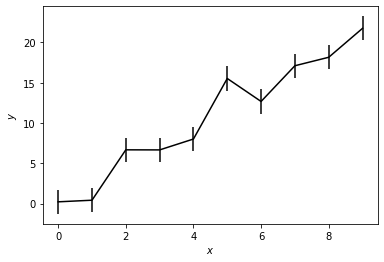

In [3]:
x_data = np.linspace(0,9,10)
y_data = np.array([0.22,0.42,6.67,6.66,8.01,15.52,12.67,17.10,18.15,21.74])
sigma0 = 1.5

plt.errorbar(x_data,y_data,yerr=sigma0,color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<div style="text-align: justify">
We therefore make the hypothesis that
\begin{align}
h_\theta(x) = a + b x
\end{align}
with $\theta = (a,b)$ being the two parameters. The following code uses MCMC to sample $m$ points according to the distribution $p_{\Theta | \vec E}$.
</div>

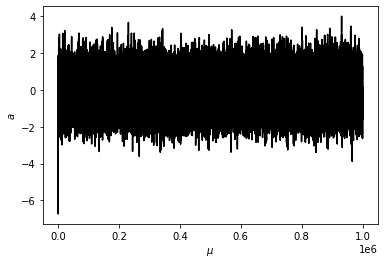

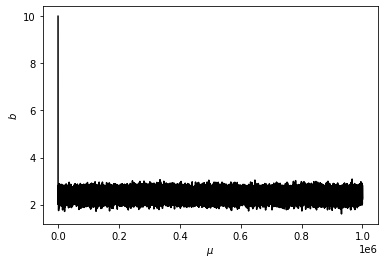

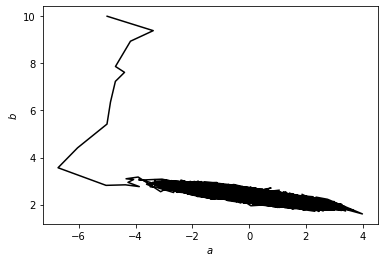

In [4]:
def h(x,theta): # Hypothesis of the fit
    return theta[0] + theta[1]*x

def S(theta): # Log-likelihood
    return sum((y_data - h(x_data,theta))**2/(2 * sigma0**2))

np.random.seed(1)

m = 10e5
theta0 = np.array([-5,10]) # Starting point in parameter space a = 10 and b = 10
theta_sequence = np.array(markov_chain(theta0,1,int(m),S))

# plot of values of a in the sequence
plt.plot(theta_sequence[:,0],'k')
plt.xlabel('$\mu$')
plt.ylabel('$a$')
plt.show()

# plot of values of b in the sequence
plt.plot(theta_sequence[:,1],'k')
plt.xlabel('$\mu$')
plt.ylabel('$b$')
plt.show()

# 2d plot of values (a,b) (i.e., parameter space)
plt.plot(theta_sequence[:,0],theta_sequence[:,1],'k')
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.show()

<div style="text-align: justify">
The burn-in phase is particularly clear in the 2d plot. Excluding it (by starting at $\mu=1000$ to be sure), and plotting a 2d histogram (where the hight of the column is represented by color), the profile of the pdf of $\theta = (a,b)$ becomes clear:
</div>

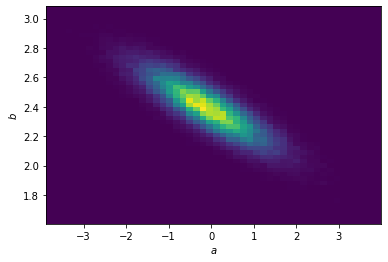

In [5]:
a = theta_sequence[1000:,0]
b = theta_sequence[1000:,1]

plt.hist2d(a,b,bins=(50, 50))
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.show()

<div style="text-align: justify">
Next, we use the sequence thus obtained to evaluate $a_*$ and $b_*$, as well as the errors $\sigma_a$ and $\sigma_b$.
</div>

In [6]:
mean_a = expected_value(F_power,a,1)
mean_b = expected_value(F_power,b,1)

sigma_a = np.sqrt(expected_value(F_power,a,2) - mean_a**2)
sigma_b = np.sqrt(expected_value(F_power,b,2) - mean_b**2)

print("a_* = {0}".format(mean_a))
print("b_* = {0}".format(mean_b))
print("sigma_a = {0}".format(sigma_a))
print("sigma_b = {0}".format(sigma_b))

# t-values
print("t_a = {0}".format(mean_a/sigma_a))
print("t_b = {0}".format(mean_b/sigma_b))

a_* = -0.07457346050353221
b_* = 2.3974432963267134
sigma_a = 0.8863256550252319
sigma_b = 0.1654945867076673
t_a = -0.08413776593368412
t_b = 14.486536049433456


<div style="text-align: justify">
The t-value of parameter $a$ is essentially $0$, which means that the model can be simplified to
\begin{align}
h_\theta(x) = b x
\end{align}
We use the estimated value of $b$ to produce the best linear fit of the data. A comparison with the actual data is provided.
</div>

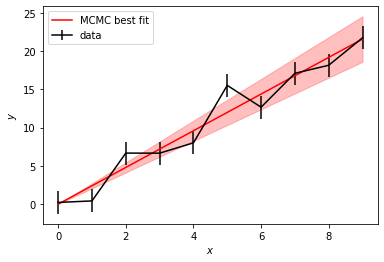

In [7]:
fit_list = [h(x,[0,mean_b]) for x in x_data]

# 2-sigma confidence for b (95%)
fit_list_min = [h(x,[0,mean_b - 2*sigma_b]) for x in x_data]
fit_list_max = [h(x,[0,mean_b + 2*sigma_b]) for x in x_data]

plt.errorbar(x_data, y_data, yerr=sigma0,color='k',label='data')
plt.plot(x_data,fit_list,'r',label='MCMC best fit')
plt.fill_between(x_data, fit_list_min, fit_list_max,color='r',alpha=0.25)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()